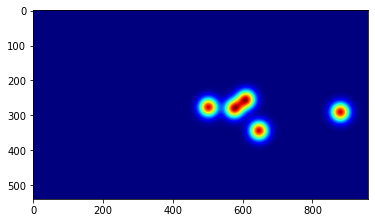

origin points [[607, 257], [502, 277], [579, 279], [880, 291], [647, 344]]


In [31]:

from PIL import Image
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
import scipy.ndimage
import cv2
import os
import glob
import random

temp = h5py.File(f'mc2_datasets/train1/ground_truth/511.h5' , 'r')
density_map = np.asarray(temp['density'])
plt.imshow(density_map,cmap = c.jet)
plt.show()

def nms(density_map):
    threshold = 0.00049

    peaks = []
    H, W = density_map.shape
    for i in range(H):
        for j in range(W):
            if density_map[i, j] > threshold:
                peaks.append([i, j, density_map[i, j]])  # 紀錄位置和值
    # print(peaks)
    people = []
    for peak in peaks:
        i, j, magnitude = peak
        is_max = True
        for idx in range(max(0, i - 1), min(H, i + 2)):
            for idy in range(max(0, j - 1), min(W, j + 2)):
                if density_map[idx, idy] > magnitude:
                    is_max = False
                    break

        if is_max:
            people.append([j,i])
    print("origin points",people)
    return people

points = nms(density_map)



In [44]:
root = './mc2_datasets/'
# mc2_test = os.path.join(root, 'test/images')
mc2_test = os.path.join(root, 'train1/images')
path_sets = [mc2_test]


img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(img_paths)

directory_path = './mc2_datasets/train1/images'  # 替換為你的目錄路徑

file_list = os.listdir(directory_path)
file_list= [os.path.splitext(file_name)[0] for file_name in file_list]
print(file_list)
# print(len(file_list))

['./mc2_datasets/train1/images\\1.jpg', './mc2_datasets/train1/images\\10.jpg', './mc2_datasets/train1/images\\1010.jpg', './mc2_datasets/train1/images\\1011.jpg', './mc2_datasets/train1/images\\1012.jpg', './mc2_datasets/train1/images\\1013.jpg', './mc2_datasets/train1/images\\1014.jpg', './mc2_datasets/train1/images\\1015.jpg', './mc2_datasets/train1/images\\1016.jpg', './mc2_datasets/train1/images\\1017.jpg', './mc2_datasets/train1/images\\1018.jpg', './mc2_datasets/train1/images\\1019.jpg', './mc2_datasets/train1/images\\1020.jpg', './mc2_datasets/train1/images\\1021.jpg', './mc2_datasets/train1/images\\1022.jpg', './mc2_datasets/train1/images\\1023.jpg', './mc2_datasets/train1/images\\1024.jpg', './mc2_datasets/train1/images\\1025.jpg', './mc2_datasets/train1/images\\1026.jpg', './mc2_datasets/train1/images\\1027.jpg', './mc2_datasets/train1/images\\15.jpg', './mc2_datasets/train1/images\\16.jpg', './mc2_datasets/train1/images\\17.jpg', './mc2_datasets/train1/images\\266.jpg', './

In [78]:
def add_random(people_list,density_map):
    random_point = [np.random.randint(100, density_map.shape[1]-200), np.random.randint(100, density_map.shape[0]-200)]
    people_list.append(random_point)
    print(random_point)
    print("Add points",people_list)
    return  people_list

def remove_point(people_list):
    n = len(people_list)
    num = random.randint(0,n-1)
    people_list.pop(num)
    print(num)
    print("Remove points:",people_list)
    return people_list

def shift(people_list,density_map):
    random_point = [np.random.randint(100, density_map.shape[1]-200), np.random.randint(200, density_map.shape[0]-200)]
    print(random_point)
    people_list.append(random_point)
#     n = len(people_list)
    people_list.pop(0)
#     else:
#         num = random.randint(0,n-1)
#         people_list.pop(num)
        
    print("Shift  points",people_list)
    return people_list

# people = nms(density_map)
# add_people = add_random(people,density_map)

# people = nms(density_map)
# remove_people = remove_point(people)

# people = nms(density_map)
# shift_people = shift(people,density_map)

def generateh5(img_paths):
    for  i_ in range(len(img_paths)):
        gt_file = h5py.File(img_paths[i_].replace('.jpg', '.h5').replace('images', 'ground_truth'), 'r')
        density_map = np.asarray(gt_file['density'])
        points = nms(density_map)
        
#         add_people = add_random(points,density_map)
#         remove_people = remove_point(points)
        shift_people = shift(points,density_map)
        
        pts = np.array(shift_people)
        gt = np.zeros((540, 960), dtype=np.float32)
#         print("gt shape :　", gt.shape)

        for pt in pts:
            gt[int(pt[1]), int(pt[0])] = 1.

        density = np.zeros(gt.shape, dtype=np.float32)
        gt_count = np.count_nonzero(gt)
        pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
        print('generate density...')

        for i, pt in enumerate(pts):
            pt2d = np.zeros(gt.shape, dtype=np.float32)
            pt2d[int(pt[1]), int(pt[0])] = 1.

            density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma=18, mode='constant') # 這邊使用 18 如果是 120*68 用 2 or 3
        
        os.makedirs(f'./mc2_datasets/negative/{file_list[i_]}/0', exist_ok=True)
        print(f'{file_list[i_]}')
        with h5py.File(f'./mc2_datasets/negative/{file_list[i_]}/0/{file_list[i_]}_1.h5', 'w') as hf:
            hf['density'] = density

    #     plt.imshow(density,cmap = c.jet)
    #     plt.show()
        print('done.')

    
generateh5(img_paths)
# generateh5(remove_people)
# generateh5(shift_people)

origin points [[646, 265], [474, 278], [849, 291]]
[685, 220]
Shift  points [[474, 278], [849, 291], [685, 220]]
generate density...
1
done.
origin points [[636, 264], [419, 284], [218, 310]]
[600, 282]
Shift  points [[419, 284], [218, 310], [600, 282]]
generate density...
10
done.
origin points [[615, 194], [658, 241], [503, 260], [854, 263]]
[571, 234]
Shift  points [[658, 241], [503, 260], [854, 263], [571, 234]]
generate density...
1010
done.
origin points [[605, 194], [657, 242], [499, 261], [849, 261]]
[240, 282]
Shift  points [[657, 242], [499, 261], [849, 261], [240, 282]]
generate density...
1011
done.
origin points [[608, 186], [565, 189], [660, 239], [500, 259], [858, 262]]
[533, 206]
Shift  points [[565, 189], [660, 239], [500, 259], [858, 262], [533, 206]]
generate density...
1012
done.
origin points [[705, 187], [773, 188], [656, 242], [501, 260], [857, 262]]
[576, 227]
Shift  points [[773, 188], [656, 242], [501, 260], [857, 262], [576, 227]]
generate density...
1013
don

298
done.
origin points [[658, 206], [562, 255], [812, 288], [703, 330], [311, 385]]
[559, 275]
Shift  points [[562, 255], [812, 288], [703, 330], [311, 385], [559, 275]]
generate density...
299
done.
origin points [[641, 212], [562, 255], [811, 289], [385, 302], [729, 347]]
[626, 338]
Shift  points [[562, 255], [811, 289], [385, 302], [729, 347], [626, 338]]
generate density...
300
done.
origin points [[636, 216], [566, 257], [813, 289], [707, 331], [381, 333]]
[670, 211]
Shift  points [[566, 257], [813, 289], [707, 331], [381, 333], [670, 211]]
generate density...
301
done.
origin points [[628, 213], [562, 255], [821, 292], [366, 316], [706, 334]]
[106, 232]
Shift  points [[562, 255], [821, 292], [366, 316], [706, 334], [106, 232]]
generate density...
302
done.
origin points [[632, 217], [563, 257], [813, 289], [371, 322], [704, 331]]
[341, 229]
Shift  points [[563, 257], [813, 289], [371, 322], [704, 331], [341, 229]]
generate density...
303
done.
origin points [[627, 213], [566, 25

6
done.
origin points [[318, 193], [609, 255], [413, 272]]
[641, 233]
Shift  points [[609, 255], [413, 272], [641, 233]]
generate density...
7
done.
origin points [[369, 201], [613, 254]]
[291, 321]
Shift  points [[613, 254], [291, 321]]
generate density...
8
done.


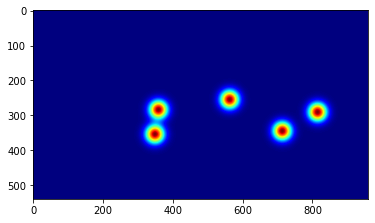

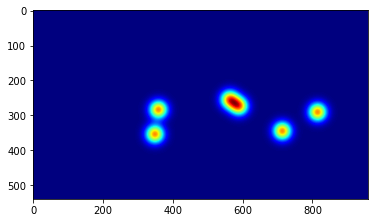

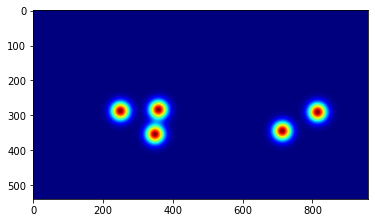

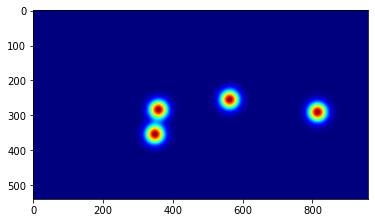

In [81]:
n = 279

temp = h5py.File(f'mc2_datasets/train1/ground_truth/{n}.h5' , 'r')
density_map = np.asarray(temp['density'])
plt.imshow(density_map,cmap = c.jet)
plt.show()

temp = h5py.File(f'mc2_datasets/negative/{n}/0/{n}.h5' , 'r')
density_map = np.asarray(temp['density'])
plt.imshow(density_map,cmap = c.jet)
plt.show()

temp = h5py.File(f'mc2_datasets/negative/{n}/0/{n}_1.h5' , 'r')
density_map = np.asarray(temp['density'])
plt.imshow(density_map,cmap = c.jet)
plt.show()

temp = h5py.File(f'mc2_datasets/negative/{n}/0/{n}_2.h5' , 'r')
density_map = np.asarray(temp['density'])
plt.imshow(density_map,cmap = c.jet)
plt.show()